In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\admin\Desktop\Study Material\SEM V\Machine Learning\car.csv')
data.head()

,buying,mant,doors,persons,lug_boots,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.info

<bound method DataFrame.info of      buying   mant  doors  persons  lug_boots  safety    car
0     vhigh  vhigh      2        2      small     low  unacc
1     vhigh  vhigh      2        2      small     med  unacc
2     vhigh  vhigh      2        2      small    high  unacc
3     vhigh  vhigh      2        2        med     low  unacc
4     vhigh  vhigh      2        2        med     med  unacc
...     ...    ...    ...      ...        ...     ...    ...
1723    low    low  5more     more        med     med   good
1724    low    low  5more     more        med    high  vgood
1725    low    low  5more     more        big     low  unacc
1726    low    low  5more     more        big     med   good
1727    low    low  5more     more        big    high  vgood

[1728 rows x 7 columns]>

In [4]:
data.describe()

,buying,mant,doors,persons,lug_boots,safety,car
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in data:
    if data[col].dtypes=='object':
        data[col]=le.fit_transform(data[col])

In [6]:
data.head()

,buying,mant,doors,persons,lug_boots,safety,car
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [7]:
X = data.iloc[:,0:6]
X.head()

,buying,mant,doors,persons,lug_boots,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [8]:
Y = data[['car']]
Y.head()

,car
0,2
1,2
2,2
3,2
4,2


In [9]:
# Splitting data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# train the decision tree
from sklearn import tree, metrics
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [11]:
Y_pred = dtree.predict(X_test)
Y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2,

In [12]:
# Accuracy of the algorithm
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred.round()))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        83
           1       0.00      0.00      0.00        11
           2       0.79      0.97      0.87       235
           3       0.00      0.00      0.00        17

    accuracy                           0.74       346
   macro avg       0.32      0.33      0.32       346
weighted avg       0.66      0.74      0.69       346



C:\Users\admin\Downloads\Anaconda Files\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\Downloads\Anaconda Files\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\Downloads\Anaconda Files\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

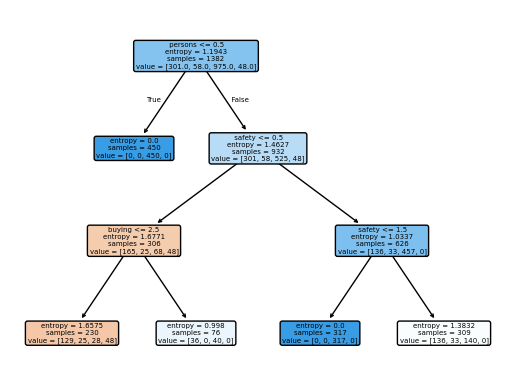

In [13]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dtree, feature_names = data.columns, 
                     filled = True , precision = 4, rounded = True)